In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pennylane as qml
from alu_v0_27 import *

In [2]:
def draw_device_graph_with_labels(device_graph,katz_centrality, qubit_assignments=None):
    """
    Draws a physical qubit graph with enhanced aesthetics and labels:
      - Physical node number (black, center)
      - Katz centrality (red, above node)
      - Qubit assignment (green, below node)
      
    Parameters:
      device_graph: dict {node: [neighbors]} representing hardware connectivity.
      qubit_assignments: list of tuples (node, qubit) for physical assignment.
      alpha, beta: parameters for computing Katz centrality.
    """
    # Create an undirected graph from the device_graph.
    G = nx.Graph(device_graph)
    
    # Compute Katz centrality.
    katz = katz_centrality
    
    # Compute node positions using spring layout.
    pos = nx.spring_layout(G, seed=42)
    
    # Convert qubit_assignments list into a dict.
    qubit_assignment_dict = {}
    if qubit_assignments is not None:
        qubit_assignment_dict = qubit_assignments
    
    # Set up the plot.
    plt.figure(figsize=(10, 10))
    
    # Draw nodes with a light blue fill, black edge.
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='#87CEEB',
                           edgecolors='black', linewidths=2)
    
    # Draw edges.
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
    
    # 1. Draw physical node number at the center (black, bold).
    node_labels = {n: str(n) for n in G.nodes()}
    nx.draw_networkx_labels(
        G, pos, labels=node_labels,
        font_color='black', font_size=14, font_weight='bold'
    )
    
    # 2. Draw Katz centrality labels slightly above the node (red).
    katz_labels = {n: f"{katz[n]:.4f}" for n in G.nodes()}
    pos_katz = {n: (x, y + 0.15) for n, (x, y) in pos.items()}
    nx.draw_networkx_labels(
        G, pos_katz, labels=katz_labels,
        font_color='red', font_size=12,
        bbox=dict(facecolor='white', edgecolor='none', pad=0.3)
    )
    
    # 3. Draw qubit assignment labels slightly below the node (green).
    qubit_labels = {n: str(qubit_assignment_dict[n]) for n in G.nodes() if n in qubit_assignment_dict}
    pos_qubit = {n: (x, y - 0.15) for n, (x, y) in pos.items()}
    nx.draw_networkx_labels(
        G, pos_qubit, labels=qubit_labels,
        font_color='green', font_size=12,
        bbox=dict(facecolor='white', edgecolor='none', pad=0.3)
    )
    
    # Adjust y-axis limits to ensure labels above the highest node are visible.
    y_values = [y for (x, y) in pos.values()]
    plt.ylim(min(y_values) - 0.3, max(y_values) + 0.3)
    
    # Create legend patches.
    patch_node  = mpatches.Patch(color='#87CEEB', label='Physical Node')
    patch_katz  = mpatches.Patch(color='red', label='Katz Centrality')
    patch_qubit = mpatches.Patch(color='green', label='Qubit Assignment')
    plt.legend(handles=[patch_node, patch_katz, patch_qubit], loc='upper left')
    
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [15]:
from collections import defaultdict

# Given circuit (each gate: (gate_type, [qubit1, qubit2], gate_name))

'''
circuit = [
    ("CNOT", [0, 1], "g1"),
    ("CNOT", [0, 2], "g2"),
    ("CNOT", [1, 3], "g3"),
    ("CNOT", [0, 4], "g4"),
    ("CNOT", [2, 4], "g5")
]

# Define the physical qubit graph (T-shaped device)
device_graph = {
    0: [1],
    1: [0, 2, 3],
    2: [1],
    3: [1, 4],
    4: [3]
}
'''
circuit = [
    ("CNOT", [3, 4], "g1"),
    ("CNOT", [2, 1], "g2"),
    ("CNOT", [1, 3], "g3"),
    ("CNOT", [2, 1], "g4"),
    ("CNOT", [3, 2], "g5"),
    ("CNOT", [3, 1], "g6"),
    ("CNOT", [2, 1], "g7"),
    ("CNOT", [3, 2], "g8"),
    ("CNOT", [1, 3], "g9"),
    ("CNOT", [2, 0], "g10"),
    ("CNOT", [0, 4], "g11"),
    ("CNOT", [2, 0], "g12"),
    ("CNOT", [4, 2], "g13"),
    ("CNOT", [4, 0], "g14"),
    ("CNOT", [2, 0], "g15"),
    ("CNOT", [4, 2], "g16"),
    ("CNOT", [0, 4], "g17")
]

# Define the physical qubit graph (T-shaped device)

device_graph = {
    0: [1, 5],
    1: [0, 2, 6, 7],
    2: [1, 3, 7, 6],
    3: [2, 4, 8,9],
    4: [3, 9,8],
    5: [0, 6, 10,11],
    6: [1, 5, 7, 11,10],
    7: [2, 6, 8, 12,13],
    8: [3, 7, 9, 13,12],
    9: [4, 8,14],
    10: [5, 11,15],
    11: [6, 10, 12,16,17],
    12: [7, 11, 13, 17,16],
    13: [8, 12, 14, 18,19],
    14: [9,13, 19,18],
    15: [10, 16],
    16: [15, 11, 17, 12],
    17: [12, 16, 18,11],
    18: [13, 17, 19,14],
    19: [14, 18,13]
}



# Use a defaultdict to store counts of interactions for each unordered pair of qubits.
interaction_dict = defaultdict(int)

# Process each gate in the circuit.
for gate in circuit:
    _, qubits, _ = gate
    if len(qubits) == 2:
        # Sort the qubit indices to ensure a unique key for the unordered pair.
        key = tuple(sorted(qubits))
        interaction_dict[key] += 1

# Display the interaction dictionary.
print("Interaction counts between qubit pairs:")
print(interaction_dict)


Interaction counts between qubit pairs:
defaultdict(<class 'int'>, {(3, 4): 1, (1, 2): 3, (1, 3): 3, (2, 3): 2, (0, 2): 3, (0, 4): 3, (2, 4): 2})


In [16]:
# Calculate total interactions per qubit.
interaction_count = defaultdict(int)
for (q1, q2), count in interaction_dict.items():
    interaction_count[q1] += count
    interaction_count[q2] += count

# Create a priority stack as a list of (qubit, total_interactions) sorted in descending order.
priority_stack = sorted(interaction_count.items(), key=lambda x: x[1], reverse=True)

# Display the priority stack.
print("Priority Stack (qubit, total interactions):")
for qubit, total in priority_stack:
    print(f"Qubit {qubit}: {total} interactions")

Priority Stack (qubit, total interactions):
Qubit 2: 10 interactions
Qubit 3: 6 interactions
Qubit 4: 6 interactions
Qubit 1: 6 interactions
Qubit 0: 6 interactions


In [17]:
import networkx as nx

# Create an undirected graph from the device_graph dictionary
G = nx.Graph(device_graph)

# Compute the Katz centrality.
# The alpha parameter must be less than the reciprocal of the largest eigenvalue of the adjacency matrix.
# Here we use alpha=0.1 and beta=1.0 as example parameters.
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0)

# Display the Katz centrality for each node
print("Katz centrality for each node:")
for node, centrality in sorted(katz_centrality.items()):
    print(f"Node {node}: {centrality:.4f}")


Katz centrality for each node:
Node 0: 0.1646
Node 1: 0.2134
Node 2: 0.2176
Node 3: 0.2101
Node 4: 0.1904
Node 5: 0.2118
Node 6: 0.2607
Node 7: 0.2710
Node 8: 0.2636
Node 9: 0.2094
Node 10: 0.2118
Node 11: 0.2607
Node 12: 0.2710
Node 13: 0.2636
Node 14: 0.2094
Node 15: 0.1646
Node 16: 0.2134
Node 17: 0.2176
Node 18: 0.2101
Node 19: 0.1904


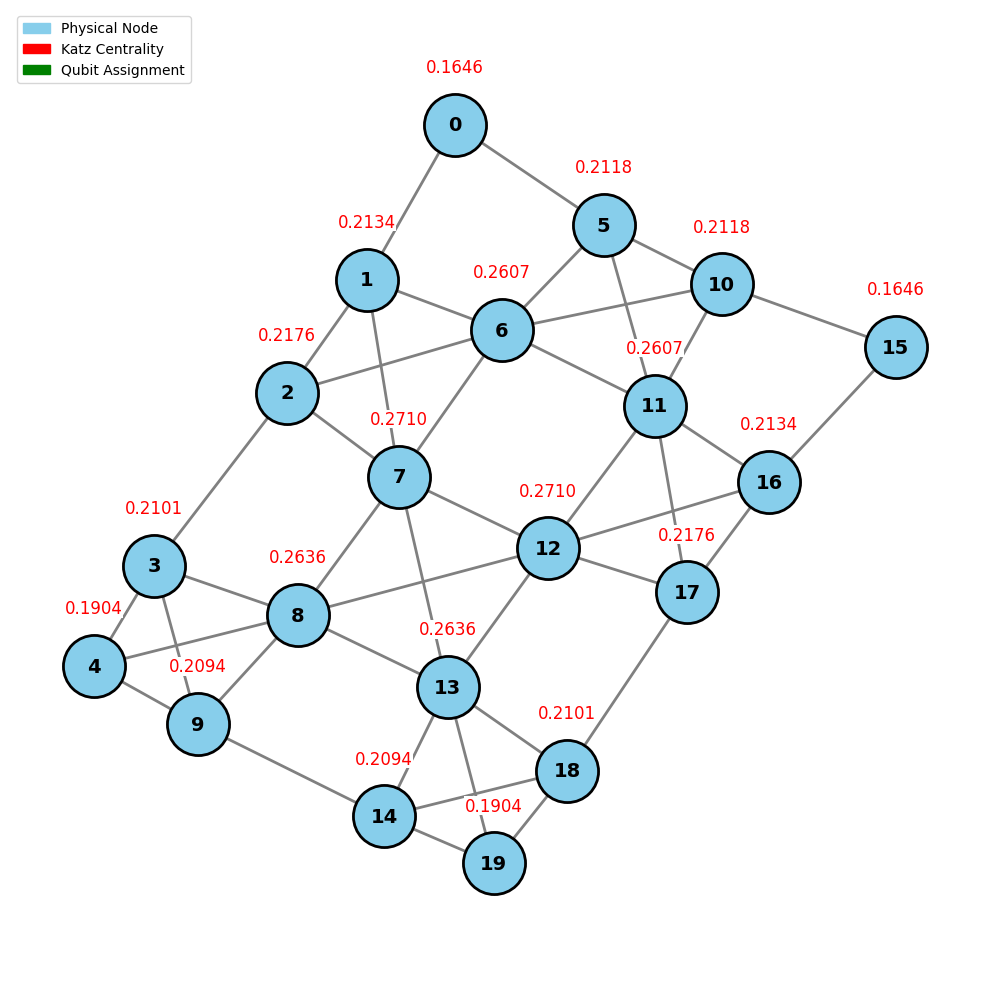

In [18]:
draw_device_graph_with_labels(device_graph, katz_centrality)

In [19]:
assignment = {}
logical_to_physical = {}

def get_logical_neighbors(logical_qubit):
    """
    Return the set of logical qubits that interact with the given logical_qubit.
    """
    neighbors = set()
    for (q1, q2), count in interaction_dict.items():
        if logical_qubit == q1:
            neighbors.add(q2)
        elif logical_qubit == q2:
            neighbors.add(q1)
    return neighbors

def get_tiebreaker_score(candidate, current_parent):
    """
    For a candidate logical qubit, compute a tiebreaker score based on the total interactions
    it has with all other qubits except current_parent and current_parent's neighbors.
    """
    parent_neighbors = get_logical_neighbors(current_parent)
    exclude_set = parent_neighbors.union({current_parent})
    score = 0
    for (q1, q2), count in interaction_dict.items():
        if candidate == q1 and q2 not in exclude_set:
            score += count
        elif candidate == q2 and q1 not in exclude_set:
            score += count
    return score

def get_best_physical_node(unassigned):
    """
    From a set of unassigned physical nodes, return the one with the highest Katz centrality.
    """
    candidates = [(node, katz_centrality[node]) for node in unassigned]
    best = max(candidates, key=lambda x: x[1])
    return best[0]

# ---------------------------------------------------
# Main Assignment Loop
# ---------------------------------------------------
iteration = 1

while priority_stack:
    # Step 1: Pick the top logical qubit from the priority stack.
    current_parent, parent_priority = priority_stack.pop(0)
    print(f"\nIteration {iteration}:")
    print(f"Selected current_parent: Logical qubit q{current_parent} (priority: {parent_priority})")
    
    # Step 1 (continued): Assign current_parent to the unassigned physical node with highest Katz centrality.
    unassigned_physical = set(device_graph.keys()) - set(assignment.keys())
    if not unassigned_physical:
        print("No unassigned physical nodes left!")
        break
    best_physical = get_best_physical_node(unassigned_physical)
    assignment[best_physical] = current_parent
    logical_to_physical[current_parent] = best_physical
    print(f"Assigned q{current_parent} to physical node {best_physical}")
    
    # Draw the current state.
    #draw_device_graph_with_labels(device_graph, assignment, iteration, katz_centrality)
    
    # Step 2: current_parent is now assigned.
    # Step 3: Get its logical neighbors.
    logical_neighbors = get_logical_neighbors(current_parent)
    # Only consider those still unassigned (i.e. still in priority_stack).
    remaining_logical = {q for (q, cnt) in priority_stack}
    candidate_neighbors = logical_neighbors.intersection(remaining_logical)
    
    # While there are neighbors of current_parent unassigned:
    while candidate_neighbors:
        # Step 4: From candidate_neighbors, select the one with highest priority value.
        # Gather candidate (logical qubit, priority value) pairs.
        candidates = []
        for candidate in candidate_neighbors:
            for (q, cnt) in priority_stack:
                if q == candidate:
                    candidates.append((candidate, cnt))
                    break
        candidates.sort(key=lambda x: x[1], reverse=True)
        top_value = candidates[0][1]
        top_candidates = [cand for cand, val in candidates if val == top_value]
        if len(top_candidates) > 1:
            # Tiebreaker: choose candidate with highest tiebreaker score.
            tiebreaker_scores = [(cand, get_tiebreaker_score(cand, current_parent)) for cand in top_candidates]
            tiebreaker_scores.sort(key=lambda x: x[1], reverse=True)
            chosen_candidate = tiebreaker_scores[0][0]
        else:
            chosen_candidate = candidates[0][0]
        
        # Step 5: Assign chosen_candidate to the unassigned physical node with highest Katz centrality.
        unassigned_physical = set(device_graph.keys()) - set(assignment.keys())
        if not unassigned_physical:
            print("No unassigned physical nodes left!")
            break
        best_physical = get_best_physical_node(unassigned_physical)
        assignment[best_physical] = chosen_candidate
        logical_to_physical[chosen_candidate] = best_physical
        print(f"Assigned neighbor q{chosen_candidate} (child of q{current_parent}) to physical node {best_physical}")
        
        # Step 6: Remove chosen_candidate from the priority stack.
        priority_stack = [(q, cnt) for (q, cnt) in priority_stack if q != chosen_candidate]
        print("Updated Priority Stack:", priority_stack)
        
        iteration += 1
        #draw_device_graph_with_labels(device_graph, assignment, iteration, katz_centrality)
        
        # Update candidate_neighbors (neighbors of current_parent still unassigned)
        remaining_logical = {q for (q, cnt) in priority_stack}
        candidate_neighbors = logical_neighbors.intersection(remaining_logical)
    
    iteration += 1

print("\nFinal Assignment (physical node -> logical qubit):")
for phys in sorted(assignment.keys()):
    print(f"Physical node {phys} -> Logical qubit q{assignment[phys]}")

print("\nFinal Priority Stack:", priority_stack)


Iteration 1:
Selected current_parent: Logical qubit q2 (priority: 10)
Assigned q2 to physical node 12
Assigned neighbor q0 (child of q2) to physical node 7
Updated Priority Stack: [(3, 6), (4, 6), (1, 6)]
Assigned neighbor q1 (child of q2) to physical node 8
Updated Priority Stack: [(3, 6), (4, 6)]
Assigned neighbor q3 (child of q2) to physical node 13
Updated Priority Stack: [(4, 6)]
Assigned neighbor q4 (child of q2) to physical node 11
Updated Priority Stack: []

Final Assignment (physical node -> logical qubit):
Physical node 7 -> Logical qubit q0
Physical node 8 -> Logical qubit q1
Physical node 11 -> Logical qubit q4
Physical node 12 -> Logical qubit q2
Physical node 13 -> Logical qubit q3

Final Priority Stack: []


In [20]:
print(assignment)

{12: 2, 7: 0, 8: 1, 13: 3, 11: 4}


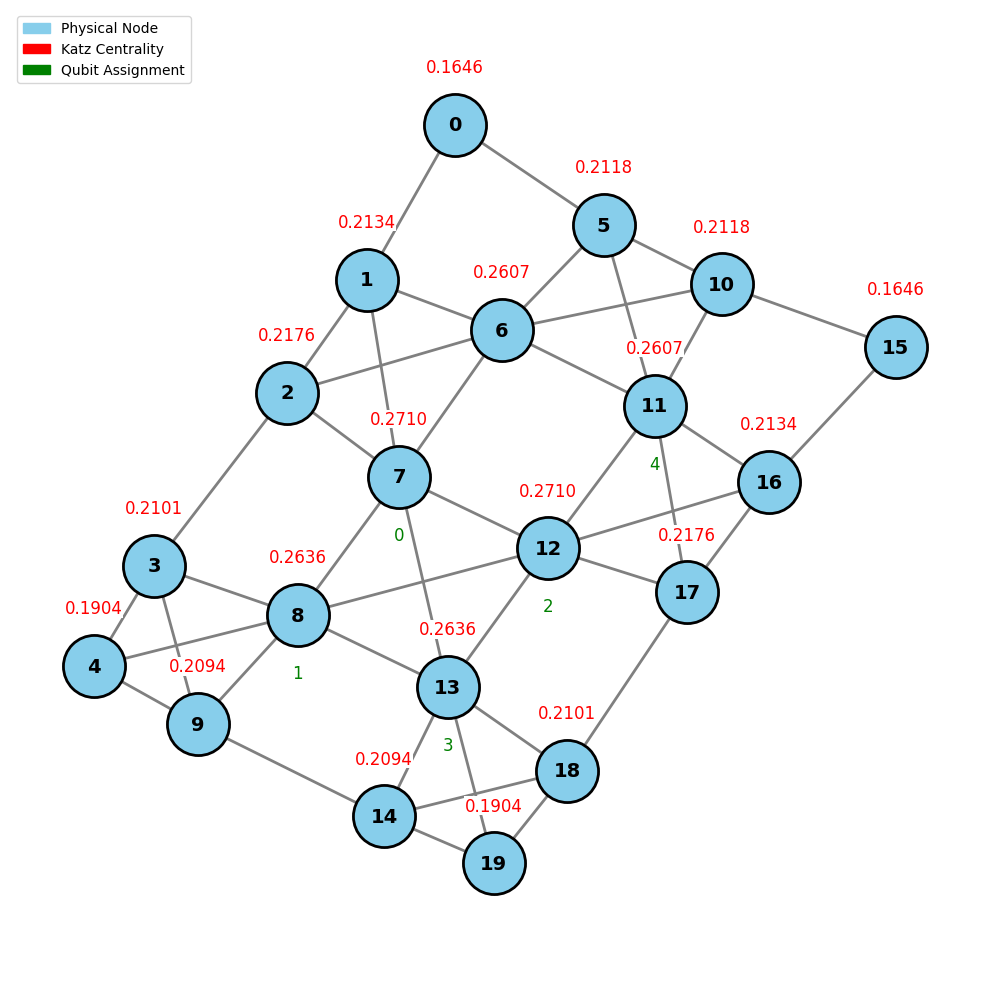

In [21]:
draw_device_graph_with_labels(device_graph,katz_centrality, assignment)

In [22]:
def build_circuit_dag(circuit):
    # circuit_dag will store adjacency as: gate -> [list_of_successors]
    circuit_dag = defaultdict(list)
    # keep track of all the qubits used by each gate
    qubit_usage = {}
    gate_list = []

    for idx, gate in enumerate(circuit):
        gate_type, qubits, gate_id = gate
        gate_list.append(gate_id)
        qubit_usage[gate_id] = qubits

    # For each pair of gates, see if they share qubits
    # and if there's an ordering in the original circuit
    for i in range(len(circuit)):
        _, qubits_i, id_i = circuit[i]
        for j in range(i+1, len(circuit)):
            _, qubits_j, id_j = circuit[j]
            # If they share any qubit, then there's a dependence
            if qubits_i[1] in qubits_j:
                # i must come before j in the circuit listing
                circuit_dag[id_j].append(id_i)
            

    return circuit_dag, gate_list

circuit_dag, gate_list = build_circuit_dag(circuit)

In [24]:
print("Circuit DAG:")
for g in circuit_dag:
    print(g, "->", circuit_dag[g])
print("\nGate List:")
print(gate_list)

Circuit DAG:
g11 -> ['g1', 'g10']
g13 -> ['g1', 'g5', 'g8', 'g11']
g14 -> ['g1', 'g10', 'g11', 'g12']
g16 -> ['g1', 'g5', 'g8', 'g11', 'g13']
g17 -> ['g1', 'g10', 'g11', 'g12', 'g14', 'g15']
g3 -> ['g2']
g4 -> ['g2']
g6 -> ['g2', 'g3', 'g4']
g7 -> ['g2', 'g4', 'g5', 'g6']
g9 -> ['g2', 'g3', 'g4', 'g6', 'g7']
g5 -> ['g3']
g8 -> ['g3', 'g5']
g10 -> ['g5', 'g8']
g12 -> ['g5', 'g8', 'g10']
g15 -> ['g5', 'g8', 'g10', 'g12', 'g13', 'g14']

Gate List:
['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17']


In [25]:
print(circuit_dag)

defaultdict(<class 'list'>, {'g11': ['g1', 'g10'], 'g13': ['g1', 'g5', 'g8', 'g11'], 'g14': ['g1', 'g10', 'g11', 'g12'], 'g16': ['g1', 'g5', 'g8', 'g11', 'g13'], 'g17': ['g1', 'g10', 'g11', 'g12', 'g14', 'g15'], 'g3': ['g2'], 'g4': ['g2'], 'g6': ['g2', 'g3', 'g4'], 'g7': ['g2', 'g4', 'g5', 'g6'], 'g9': ['g2', 'g3', 'g4', 'g6', 'g7'], 'g5': ['g3'], 'g8': ['g3', 'g5'], 'g10': ['g5', 'g8'], 'g12': ['g5', 'g8', 'g10'], 'g15': ['g5', 'g8', 'g10', 'g12', 'g13', 'g14']})


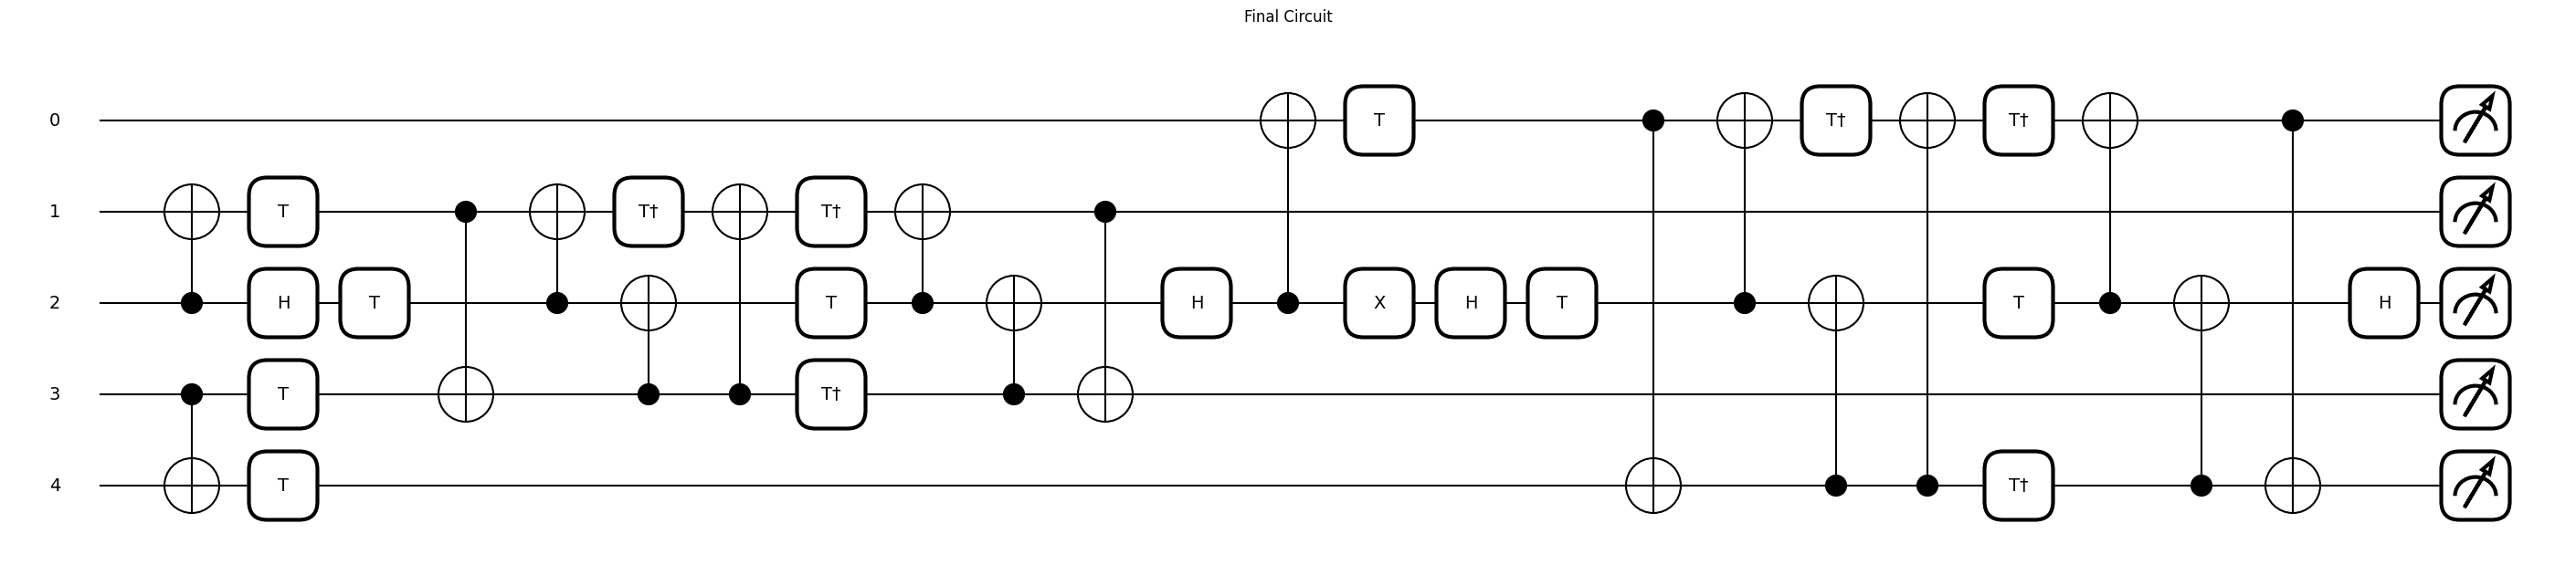

In [14]:
fig, ax = qml.draw_mpl(alu_v0_circuit)()
plt.title("Final Circuit")
plt.show()